In [ ]:
""" ADD TO PREDICT - Data_Profiling Notebook"""
# Mount Colab to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Writing Workshop
© Explore Data Science Academy

---
### Honour Code

We **The Iris Team**, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

We understand that non-compliance with the honour code constitutes a material breach of contract.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. API Experiment</a>

<a href=#one>2. Introduction</a>

<a href=#one>3. Importing Packages</a>

<a href=#two>4. Loading Data</a>

<a href=#three>5. Exploratory Data Analysis</a>

<a href=#three>6. Data Visualization</a>

<a id="two"></a>
## 1. API Experiment
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [ ]:
#Setting Api Experiment Key
from comet_ml import Experiment
from comet_ml.integration.pytorch import log_model

experiment = Experiment(
  api_key = "UACsQYTfd4Q0SngFjCM421gAG",
  project_name = "Writing Workshop",
  workspace="captaineferh"
)

<a id="two"></a>
## 2. Introduction
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Welcome to our Notebook, where we're embarking on an exciting journey of data analysis and exploration within the realm of supply chain logistics. Our mission is to unravel the complexities of the 'Supply Chain Logistics' dataset, consisting of seven tables ('OrderList,' 'FreightRates,' 'WhCosts,' 'WhCapacities,' 'ProductsPerPlant,' 'VmiCustomers,' and 'PlantPorts'). Through rigorous data exploration and visualization, we aim to uncover valuable insights, trends, and opportunities for supply chain optimization.

Let's begin by introducing the datasets that form the foundation of our analysis:

1. **OrderList:** This dataset contains detailed information about orders within the supply chain. We will explore order characteristics, fulfillment timelines, and patterns to enhance order processing efficiency.

2. **FreightRates:** In the 'FreightRates' dataset, we have data related to freight transportation costs. Our goal is to visualize and analyze the cost dynamics to optimize transportation decisions.

3. **WhCosts:** The 'WhCosts' dataset provides insights into warehouse-related costs. We'll perform cost analysis, identify cost drivers, and seek opportunities for cost reduction.

4. **WhCapacities:** With data on warehouse capacities in the 'WhCapacities' dataset, we'll assess capacity utilization and plan for efficient inventory management.

5. **ProductsPerPlant:** This dataset maps the distribution of products across different plants. We'll explore product placement strategies and their impact on supply chain performance.

6. **VmiCustomers:** The 'VmiCustomers' dataset focuses on Vendor-Managed Inventory (VMI) customers. We'll analyze VMI relationships, order patterns, and customer satisfaction metrics.

7. **PlantPorts:** Lastly, the 'PlantPorts' dataset contains geographical information about plants and ports. We'll visualize the plant-port network and assess its impact on logistics efficiency.

Our journey is guided by the pursuit of actionable insights that can enhance supply chain logistics, reduce costs, and improve overall efficiency. The questions we ask and the patterns we discover will shape our approach and drive us toward achieving these goals.

So, let's dive in, adapt our analysis to the specific challenges of supply chain logistics, and unveil the hidden knowledge within these datasets!

<a id="two"></a>
## 3. Importing Packages
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Before diving into the project, we will import essential packages for data preprocessing, model selection, and evaluation, empowering us to efficiently analyze and process the data.

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns

<a id="two"></a>
## 4. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this section, we will load an Excel file named "Supply chain logistics problem.xlsx" into a Pandas DataFrame. This is the initial step required to work with the dataset contained within the Excel file.

In [ ]:
# Load the Excel file into a DataFrame
df = pd.read_excel('Supply chain logistics problem.xlsx')

<a id="two"></a>
## 5. Exploratory Data Analysis
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


**Check the Number of Tables (Sheets) in the Dataset**

In this step, we will determine how many tables (sheets) are present in the dataset contained within the Excel file. This is useful for understanding the structure of the dataset.

In [ ]:
# Load the Excel file into an ExcelFile object
excel_file = pd.ExcelFile('Supply chain logistics problem.xlsx')

# Get the list of sheet names
sheet_names = excel_file.sheet_names

# Print the number of tables (sheets)
num_tables = len(sheet_names)
print(f'Number of tables in the dataset: {num_tables}')

# Print the list of sheet names if needed
print('Sheet names:', sheet_names)

Number of tables in the dataset: 7
Sheet names: ['OrderList', 'FreightRates', 'WhCosts', 'WhCapacities', 'ProductsPerPlant', 'VmiCustomers', 'PlantPorts']


**Read and Store Each Sheet from the Excel File Independently**

This section serves the purpose of reading and storing each sheet (table) independently into separate Pandas DataFrames. The significance of this action lies in its ability to facilitate organized and granular data manipulation and analysis. By creating a dictionary of DataFrames, each sheet can be accessed and worked with individually, allowing for focused analysis and specific operations on different parts of the dataset.

In [ ]:
# Create a dictionary to store DataFrames for each sheet
data_frames = {}

# Read each sheet into a separate DataFrame and store in the dictionary
for sheet_name in sheet_names:
    data_frames[sheet_name] = excel_file.parse(sheet_name)

**Display Column Names for Each Table in the Dataset**

This section is a crucial initial step in comprehending and effectively utilizing the dataset. By iterating through the tables within the dataset, we will retrieve and display the column names for each table. This action is pivotal as it provides a quick reference to the dataset's structure, empowering us to grasp the available data attributes. Additionally, it aids in column selection, data validation, documentation, and forms the foundation for subsequent in-depth analysis.

In [ ]:
# Display the column names for each table
for sheet_name, df in data_frames.items():
    print(f"Table: '{sheet_name}'")
    print(df.columns.tolist())  # Get and print the list of column names
    print("\n")  # Add a newline for separation

Table: 'OrderList'
['Order ID', 'Order Date', 'Origin Port', 'Carrier', 'TPT', 'Service Level', 'Ship ahead day count', 'Ship Late Day count', 'Customer', 'Product ID', 'Plant Code', 'Destination Port', 'Unit quantity', 'Weight']


Table: 'FreightRates'
['Carrier', 'orig_port_cd', 'dest_port_cd', 'minm_wgh_qty', 'max_wgh_qty', 'svc_cd', 'minimum cost', 'rate', 'mode_dsc', 'tpt_day_cnt', 'Carrier type']


Table: 'WhCosts'
['WH', 'Cost/unit']


Table: 'WhCapacities'
['Plant ID', 'Daily Capacity ']


Table: 'ProductsPerPlant'
['Plant Code', 'Product ID']


Table: 'VmiCustomers'
['Plant Code', 'Customers']


Table: 'PlantPorts'
['Plant Code', 'Port']




**Explore and Display Details of Each Table in the Dataset**

In this section, we aim to explore and display the details of each table within the dataset loaded from the Excel file. This action is significant because it allows us to gain an understanding of the structure and content of each table, making it easier to perform subsequent data analysis and manipulation tasks.

In [ ]:
# Access the 'OrderList' table from the dataset.
order_list = data_frames['OrderList']

# This DataFrame, named 'order_list', contains information about orders in the supply chain.

# Displaying the content of 'order_list' to examine the order data.
display(order_list)

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
0,1.447296e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.300000
1,1.447158e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.940000
2,1.447139e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.200000
3,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.160000
4,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9210,1.447305e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683388,PLANT03,PORT09,339,2.354118
9211,1.447319e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683388,PLANT03,PORT09,339,2.354118
9212,1.447322e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683388,PLANT03,PORT09,245,0.294265
9213,1.447145e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683430,PLANT03,PORT09,278,2.480000


In [ ]:
# Access the 'FreightRates' table from the dataset.
freight_rates = data_frames['FreightRates']

# This DataFrame, named 'freight_rates', contains information about shipping freight rates.

# Displaying the content of 'freight_rates' to examine the freight rate data.
display(freight_rates)

,Carrier,orig_port_cd,dest_port_cd,minm_wgh_qty,max_wgh_qty,svc_cd,minimum cost,rate,mode_dsc,tpt_day_cnt,Carrier type
0,V444_6,PORT08,PORT09,250.0,499.99,DTD,43.2272,0.7132,AIR,2,V88888888_0
1,V444_6,PORT08,PORT09,65.0,69.99,DTD,43.2272,0.7512,AIR,2,V88888888_0
2,V444_6,PORT08,PORT09,60.0,64.99,DTD,43.2272,0.7892,AIR,2,V88888888_0
3,V444_6,PORT08,PORT09,50.0,54.99,DTD,43.2272,0.8272,AIR,2,V88888888_0
4,V444_6,PORT08,PORT09,35.0,39.99,DTD,43.2272,1.0552,AIR,2,V88888888_0
...,...,...,...,...,...,...,...,...,...,...,...
1535,V444_8,PORT03,PORT09,0.0,99.99,DTD,29.3392,0.4116,AIR,0,V88888888_0
1536,V444_8,PORT03,PORT09,500.0,1999.99,DTD,29.3392,0.3112,AIR,0,V88888888_0
1537,V444_8,PORT03,PORT09,250.0,499.99,DTD,29.3392,0.4116,AIR,0,V88888888_0
1538,V444_8,PORT03,PORT09,2000.0,99999.99,DTD,29.3392,0.3112,AIR,0,V88888888_0


In [ ]:
# Access the 'WhCosts' table from the dataset.
warehouse_costs = data_frames['WhCosts']

# This DataFrame, named 'warehouse_costs', contains information related to warehouse costs.

# Displaying the content of 'warehouse_costs' to examine the warehouse cost data.
display(warehouse_costs)

,WH,Cost/unit
0,PLANT15,1.415063
1,PLANT17,0.428947
2,PLANT18,2.036254
3,PLANT05,0.488144
4,PLANT02,0.477504
5,PLANT01,0.566976
6,PLANT06,0.554088
7,PLANT10,0.493582
8,PLANT07,0.371424
9,PLANT14,0.634330


In [ ]:
# Access the 'WhCapacities' table from the dataset.
warehouse_capacities = data_frames['WhCapacities']

# This DataFrame, named 'warehouse_capacities', contains information about warehouse capacities.

# Displaying the content of 'warehouse_capacities' to examine the warehouse capacity data.
display(warehouse_capacities)

,Plant ID,Daily Capacity
0,PLANT15,11
1,PLANT17,8
2,PLANT18,111
3,PLANT05,385
4,PLANT02,138
5,PLANT01,1070
6,PLANT06,49
7,PLANT10,118
8,PLANT07,265
9,PLANT14,549


In [ ]:
# Access the 'ProductsPerPlant' table from the dataset.
products_per_plant = data_frames['ProductsPerPlant']

# This DataFrame, named 'products_per_plant', contains information about the products associated with each plant.

# Displaying the content of 'products_per_plant' to examine the product-plant relationship data.
display(products_per_plant)

,Plant Code,Product ID
0,PLANT15,1698815
1,PLANT17,1664419
2,PLANT17,1664426
3,PLANT17,1672826
4,PLANT17,1674916
...,...,...
2031,PLANT04,1699951
2032,PLANT04,1699952
2033,PLANT04,1699953
2034,PLANT04,1699954


In [ ]:
# Access the 'VmiCustomers' table from the dataset.
vmic = data_frames['VmiCustomers']

# This DataFrame, named 'vmic', contains information about VMI (Vendor-Managed Inventory) customers.

# Displaying the content of 'vmic' to examine data related to VMI customers.
display(vmic)

,Plant Code,Customers
0,PLANT02,V5555555555555_16
1,PLANT02,V555555555555555_29
2,PLANT02,V555555555_3
3,PLANT02,V55555555555555_8
4,PLANT02,V55555555_9
5,PLANT02,V55555_10
6,PLANT02,V55555555_5
7,PLANT06,V555555555555555_18
8,PLANT06,V55555_10
9,PLANT10,V555555555555555_29


In [ ]:
# Access the 'PlantPorts' table from the dataset.
plant_ports = data_frames['PlantPorts']

# This DataFrame, named 'plant_ports', contains information about ports associated with each plant.

# Displaying the content of 'plant_ports' to examine data related to plant-port relationships.
display(plant_ports)

,Plant Code,Port
0,PLANT01,PORT01
1,PLANT01,PORT02
2,PLANT02,PORT03
3,PLANT03,PORT04
4,PLANT04,PORT05
5,PLANT05,PORT06
6,PLANT06,PORT06
7,PLANT07,PORT01
8,PLANT07,PORT02
9,PLANT08,PORT04


**Update column names for each table**

To make the data easier to work with, we need to make a few changes:
1. Change all column headers to lowercase; and
2. Whitespaces should be replaced with underscores

In [ ]:
# List of DataFrame names
dataframes_list = ['order_list', 'freight_rates', 'warehouse_costs', 'warehouse_capacities', 'products_per_plant', 'vmic', 'plant_ports']

def preprocess_dataframes(dataframes_list):
    for df_name in dataframes_list:
        df = globals()[df_name]  # Access the DataFrame by name using globals()

        # Replace white spaces with underscores in column headers
        df.columns = df.columns.str.replace(' ', '_')

        # Change all column headers to lower case
        df.columns = df.columns.str.lower()

        # Display the preprocessed DataFrame
        print(f"Preprocessed DataFrame '{df_name}':")
        display(df)
        print("\n")

# Usage example:
preprocess_dataframes(dataframes_list)

Preprocessed DataFrame 'order_list':


,order_id,order_date,origin_port,carrier,tpt,service_level,ship_ahead_day_count,ship_late_day_count,customer,product_id,plant_code,destination_port,unit_quantity,weight
0,1.447296e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.300000
1,1.447158e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.940000
2,1.447139e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.200000
3,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.160000
4,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9210,1.447305e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683388,PLANT03,PORT09,339,2.354118
9211,1.447319e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683388,PLANT03,PORT09,339,2.354118
9212,1.447322e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683388,PLANT03,PORT09,245,0.294265
9213,1.447145e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683430,PLANT03,PORT09,278,2.480000




Preprocessed DataFrame 'freight_rates':


,carrier,orig_port_cd,dest_port_cd,minm_wgh_qty,max_wgh_qty,svc_cd,minimum_cost,rate,mode_dsc,tpt_day_cnt,carrier_type
0,V444_6,PORT08,PORT09,250.0,499.99,DTD,43.2272,0.7132,AIR,2,V88888888_0
1,V444_6,PORT08,PORT09,65.0,69.99,DTD,43.2272,0.7512,AIR,2,V88888888_0
2,V444_6,PORT08,PORT09,60.0,64.99,DTD,43.2272,0.7892,AIR,2,V88888888_0
3,V444_6,PORT08,PORT09,50.0,54.99,DTD,43.2272,0.8272,AIR,2,V88888888_0
4,V444_6,PORT08,PORT09,35.0,39.99,DTD,43.2272,1.0552,AIR,2,V88888888_0
...,...,...,...,...,...,...,...,...,...,...,...
1535,V444_8,PORT03,PORT09,0.0,99.99,DTD,29.3392,0.4116,AIR,0,V88888888_0
1536,V444_8,PORT03,PORT09,500.0,1999.99,DTD,29.3392,0.3112,AIR,0,V88888888_0
1537,V444_8,PORT03,PORT09,250.0,499.99,DTD,29.3392,0.4116,AIR,0,V88888888_0
1538,V444_8,PORT03,PORT09,2000.0,99999.99,DTD,29.3392,0.3112,AIR,0,V88888888_0




Preprocessed DataFrame 'warehouse_costs':


,wh,cost_unit
0,PLANT15,1.415063
1,PLANT17,0.428947
2,PLANT18,2.036254
3,PLANT05,0.488144
4,PLANT02,0.477504
5,PLANT01,0.566976
6,PLANT06,0.554088
7,PLANT10,0.493582
8,PLANT07,0.371424
9,PLANT14,0.634330




Preprocessed DataFrame 'warehouse_capacities':


,plant_id,daily_capacity_
0,PLANT15,11
1,PLANT17,8
2,PLANT18,111
3,PLANT05,385
4,PLANT02,138
5,PLANT01,1070
6,PLANT06,49
7,PLANT10,118
8,PLANT07,265
9,PLANT14,549




Preprocessed DataFrame 'products_per_plant':


,plant_code,product_id
0,PLANT15,1698815
1,PLANT17,1664419
2,PLANT17,1664426
3,PLANT17,1672826
4,PLANT17,1674916
...,...,...
2031,PLANT04,1699951
2032,PLANT04,1699952
2033,PLANT04,1699953
2034,PLANT04,1699954




Preprocessed DataFrame 'vmic':


,plant_code,customers
0,PLANT02,V5555555555555_16
1,PLANT02,V555555555555555_29
2,PLANT02,V555555555_3
3,PLANT02,V55555555555555_8
4,PLANT02,V55555555_9
5,PLANT02,V55555_10
6,PLANT02,V55555555_5
7,PLANT06,V555555555555555_18
8,PLANT06,V55555_10
9,PLANT10,V555555555555555_29




Preprocessed DataFrame 'plant_ports':


,plant_code,port
0,PLANT01,PORT01
1,PLANT01,PORT02
2,PLANT02,PORT03
3,PLANT03,PORT04
4,PLANT04,PORT05
5,PLANT05,PORT06
6,PLANT06,PORT06
7,PLANT07,PORT01
8,PLANT07,PORT02
9,PLANT08,PORT04


**Completeness Check**

*   Here we identify and count the number of missing values (nulls) in the dataset
*   A percentage is included to describe the proportion of missing values per column for each table




In [ ]:
def analyze_missing_values_for_dataframes(dataframes):
    for df_name in dataframes:
        df = globals()[df_name]  # Access the DataFrame by name using globals()

        # Calculate the number of missing values for each column
        missing_counts = df.isnull().sum()
        total_rows = len(df)

        # Calculate the percentage of missing values for each column
        missing_percentages = (missing_counts / total_rows) * 100

        # Output the results
        print(f"Analysis for DataFrame '{df_name}':")
        for column in df.columns:
            missing_count = missing_counts[column]
            missing_percentage = missing_percentages[column]
            print(f"There are {missing_count} ({missing_percentage:.2f}%) null entries in {column} column.")
        print("\n")

# List of DataFrame names
dataframes_list = ['order_list', 'freight_rates', 'warehouse_costs', 'warehouse_capacities', 'products_per_plant', 'vmic', 'plant_ports']

# Code loops through dataframes_list and calls function
for df_name in dataframes_list:
    analyze_missing_values_for_dataframes([df_name])

Analysis for DataFrame 'order_list':
There are 0 (0.00%) null entries in order_id column.
There are 0 (0.00%) null entries in order_date column.
There are 0 (0.00%) null entries in origin_port column.
There are 0 (0.00%) null entries in carrier column.
There are 0 (0.00%) null entries in tpt column.
There are 0 (0.00%) null entries in service_level column.
There are 0 (0.00%) null entries in ship_ahead_day_count column.
There are 0 (0.00%) null entries in ship_late_day_count column.
There are 0 (0.00%) null entries in customer column.
There are 0 (0.00%) null entries in product_id column.
There are 0 (0.00%) null entries in plant_code column.
There are 0 (0.00%) null entries in destination_port column.
There are 0 (0.00%) null entries in unit_quantity column.
There are 0 (0.00%) null entries in weight column.


Analysis for DataFrame 'freight_rates':
There are 0 (0.00%) null entries in carrier column.
There are 0 (0.00%) null entries in orig_port_cd column.
There are 0 (0.00%) null ent

**Zero values check for numeric columns in each table**



*   Here we identify and count the number of zeros (0) in the dataset
*   We include a percentage to describe the proportion of missing values per column






In [ ]:
def analyze_zero_values_for_dataframes(dataframes_list, column_lists):
    for i, df_name in enumerate(dataframes_list):
        df = globals()[df_name]  # Access the DataFrame by name using globals()

        # Calculate the total number of rows in the DataFrame
        total_rows = len(df)

        print(f"Analysis for DataFrame '{df_name}':")
        col_names = column_lists[i]  # Get the list of column names for this DataFrame
        for col_name in col_names:
            # Calculate the count of zero values for the current column
            count_zeros = (df[col_name] == 0).sum()

            # Calculate the percentage of zero values for the current column
            percentage_zeros = (count_zeros / total_rows) * 100

            # Print the count and percentage of zero values for the current column
            print(f"There are {count_zeros} ({percentage_zeros:.2f}%) zero values in {col_name} column.")
        print("\n")

# List of DataFrame names
dataframes_list = ['order_list', 'freight_rates', 'warehouse_costs', 'warehouse_capacities']

# List of lists of column names to check for zero values (one list per DataFrame)
column_lists = [
    ["unit_quantity", "weight"],
    ["minm_wgh_qty", "max_wgh_qty", "minimum_cost", "rate"],
    ["cost_unit"],
    ["daily_capacity_"]
]

# Function takes in a list of dataframe names and nested list of column names to be analyzed
analyze_zero_values_for_dataframes(dataframes_list, column_lists)

Analysis for DataFrame 'order_list':
There are 0 (0.00%) zero values in unit_quantity column.
There are 2 (0.02%) zero values in weight column.


Analysis for DataFrame 'freight_rates':
There are 92 (5.97%) zero values in minm_wgh_qty column.
There are 0 (0.00%) zero values in max_wgh_qty column.
There are 0 (0.00%) zero values in minimum_cost column.
There are 0 (0.00%) zero values in rate column.


Analysis for DataFrame 'warehouse_costs':
There are 0 (0.00%) zero values in cost_unit column.


Analysis for DataFrame 'warehouse_capacities':
There are 0 (0.00%) zero values in daily_capacity_ column.




**Summary Statistics for each table**

In [ ]:
# Defined a dictionary where keys are DataFrame names and values are lists of column names
dataframes_columns_dict = {
    'order_list': ['ship_ahead_day_count', 'ship_late_day_count', 'unit_quantity','weight'],
    'freight_rates': ['minm_wgh_qty', 'max_wgh_qty', 'minimum_cost','rate'],
    'warehouse_capacities': ['daily_capacity_']

}

# Creats an empty dictionary to store summaries for each DataFrame
summary_dict = {}

# Loop through the DataFrame names and their respective columns
for df_name, columns_to_check in dataframes_columns_dict.items():
    df = globals()[df_name]  # Access the DataFrame by name using globals()

    # Calculate summary statistics for the specified columns in the current DataFrame
    summary = df[columns_to_check].describe()

    # Store the summary in the dictionary with the DataFrame name as the key
    summary_dict[df_name] = summary

# Print the summary statistics for each DataFrame
for df_name, summary in summary_dict.items():
    print(f"Summary for DataFrame '{df_name}':")
    print(summary)
    print("\n")

Summary for DataFrame 'order_list':
       ship_ahead_day_count  ship_late_day_count  unit_quantity       weight
count           9215.000000          9215.000000    9215.000000  9215.000000
mean               1.852306             0.039935    3202.747151    19.871688
std                1.922302             0.319625   15965.622260    66.569064
min                0.000000             0.000000     235.000000     0.000000
25%                0.000000             0.000000     330.000000     1.407430
50%                3.000000             0.000000     477.000000     4.440000
75%                3.000000             0.000000    1275.500000    13.325673
max                6.000000             6.000000  561847.000000  2338.405126


Summary for DataFrame 'freight_rates':
       minm_wgh_qty   max_wgh_qty  minimum_cost         rate
count   1540.000000   1540.000000   1540.000000  1540.000000
mean     155.886637   4636.143633     12.329033     2.892656
std      475.952049  20251.309727     22.946192

<a id="two"></a>
## 6. Data Visualization
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


### Order Shipping Accuracy Analysis

In this section, we will analyse the accuracy of order shipments within the supply chain logistics. By analyzing the dataset and understanding the order shipping accuracy rate, we will get valuable insights into the effectiveness of order processing operations. This analysis is vital as it directly impacts customer satisfaction, operational efficiency, and cost management.

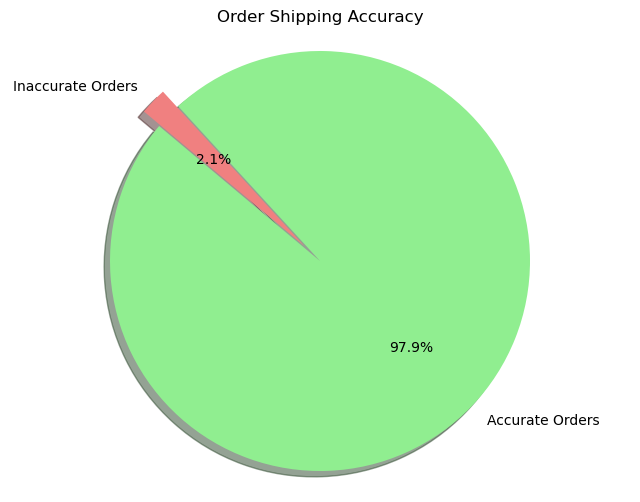

In [ ]:
# Load the 'order_list' table
order_list = pd.read_excel('Supply chain logistics problem.xlsx', sheet_name='OrderList')

# Calculate order shipping accuracy
accurate_orders = order_list[order_list['Ship Late Day count'] == 0]
accuracy_rate = len(accurate_orders) / len(order_list) * 100

# Create a pie chart to visualize order shipping accuracy
labels = ['Accurate Orders', 'Inaccurate Orders']
sizes = [accuracy_rate, 100 - accuracy_rate]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # Explode the 'Accurate Orders' slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Order Shipping Accuracy')
plt.show()

**Insight**: A high order shipping accuracy rate of 97.9% signifies that the majority of orders are consistently and correctly fulfilled within the supply chain logistics operation. This is a positive reflection of the efficiency and reliability of the order processing system. Customers are likely experiencing timely and accurate deliveries, contributing to increased satisfaction, loyalty, and potential cost savings due to fewer errors and returns.

**Recommendation**: The business should continue its proactive approach in maintaining and enhancing its impressive order shipping accuracy rate. To achieve this, a commitment to continuous improvement is paramount. By closely monitoring and addressing the remaining 2.1% inaccuracies, the company can further refine its order processing operations and solidify customer trust. Investment in employee training, quality control, and advanced technologies should be considered to minimize human errors and enhance efficiency. Customer feedback should be actively sought and integrated into operational enhancements, ensuring that customer satisfaction remains a top priority. Additionally, benchmarking against industry standards, collaborating with suppliers, and fostering a culture of adaptability and learning will contribute to sustained success in maintaining high order accuracy, reducing costs, and remaining competitive in the supply chain logistics sector.

### Analyzing the Impact of Service Level Choices on Order Distribution

In this analysis, we aim to assess the distribution of orders by 'Service Level' in our supply chain logistics dataset. Understanding the distribution of orders across different service levels is essential for evaluating the impact of service level choices on order accuracy and fulfillment. This insight will enable us to make informed decisions that can optimize service level offerings, resource allocation, performance evaluation, cost-effectiveness, and marketing strategies, ultimately enhancing our supply chain's efficiency and customer satisfaction.

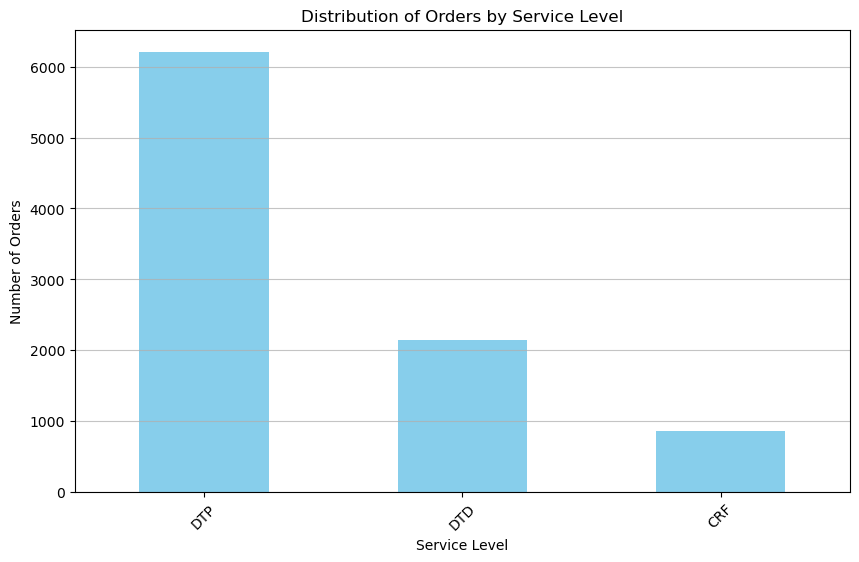

In [ ]:
# Load the 'order_list' table
order_list = pd.read_excel('Supply chain logistics problem.xlsx', sheet_name='OrderList')

# Group orders by 'Service Level' and count the number of orders in each service level
service_level_counts = order_list['Service Level'].value_counts()

# Create a bar plot to visualize the distribution of orders by service level
plt.figure(figsize=(10, 6))
service_level_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Orders by Service Level')
plt.xlabel('Service Level')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()


**Insight**: From the distribution of orders by 'Service Level' in the dataset, it shows that a majority of orders fall under the 'DTP' (Delivery Time Prompt) category, indicating a preference or requirement for prompt delivery. However, the presence of 'DTD' (Delivery Time Deferred) and 'CRF' (Critical Freight) orders highlights variation in service level choices, suggesting diverse customer needs and the importance of offering specialized handling and faster delivery options. This information ultimately allows for a tailored approach to meet the diverse demands of customers and enhance satisfaction within the supply chain logistics operations.


**Recommendation**: Based on the insight gained from the distribution of orders by 'Service Level,' it is recommended that the company focuses on optimizing its logistics operations to excel in delivering 'DTP' (Delivery Time Prompt) orders, which constitute the majority. Efficient resource allocation should prioritize 'DTP' orders while still catering to 'DTD' (Delivery Time Deferred) and 'CRF' (Critical Freight) orders. Tailored marketing strategies should emphasize the company's ability to provide prompt and reliable deliveries, enhancing customer engagement. Continuous performance evaluation, particularly for 'CRF' orders, should be a priority to ensure consistency and build trust. Consider diversifying service level offerings based on market demand, gather customer feedback, and invest in efficiency improvements to meet the varied service level expectations, ultimately enhancing customer satisfaction and competitiveness.

### Analyzing Freight Costs by Carrier to Optimize Logistics Expenses

We will check to understand the distribution of freight costs among different carriers, a vital step in optimizing logistics expenses. By analyzing and visualizing freight costs, businesses gain valuable insights into cost-efficient carriers, enabling them to negotiate favorable rates, evaluate carrier performance, and make informed decisions.

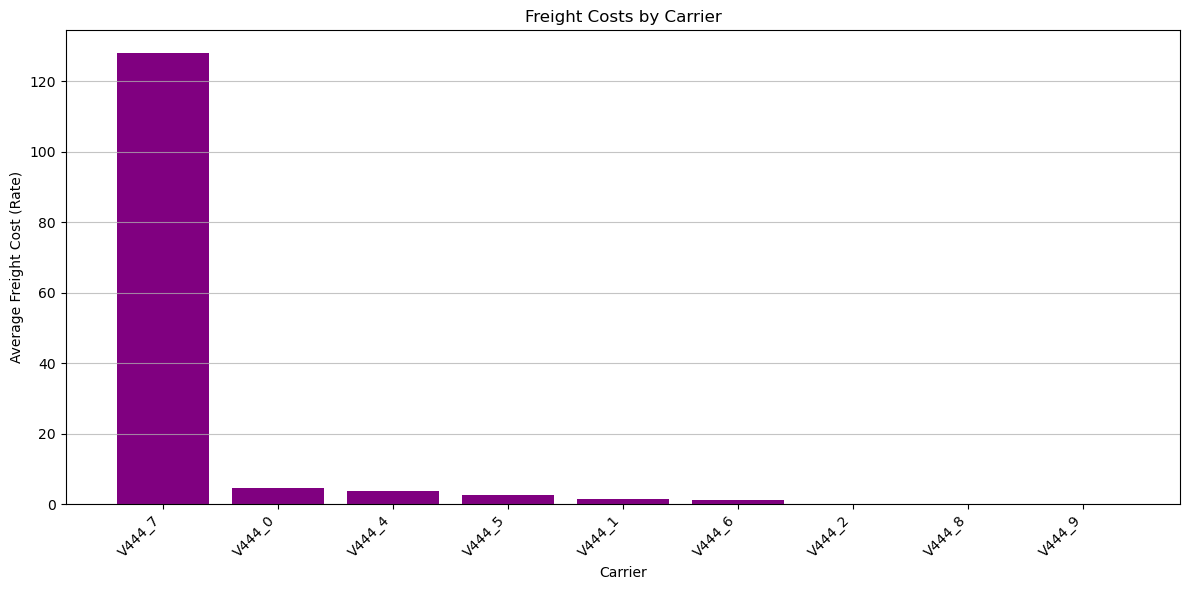

In [ ]:
# Load the 'freight_rates' table
freight_rates = pd.read_excel('Supply chain logistics problem.xlsx', sheet_name='FreightRates')

# Group the data by 'Carrier' and calculate the average freight cost ('rate') for each carrier
carrier_costs = freight_rates.groupby('Carrier')['rate'].mean().reset_index()

# Sort the carriers by average cost in descending order
carrier_costs_sorted = carrier_costs.sort_values(by='rate', ascending=False)

# Create a bar chart to visualize freight costs by carrier with a purple color
plt.figure(figsize=(12, 6))
plt.bar(carrier_costs_sorted['Carrier'], carrier_costs_sorted['rate'], color='purple')
plt.title('Freight Costs by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Average Freight Cost (Rate)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


**Insight**: The analysis of average freight costs by carrier reveals substantial cost variation within the supply chain logistics network. Carrier 'V444_7' stands out with the highest average cost, while 'V444_2,' 'V444_8,' and 'V444_9' appear as notably cost-efficient options. This insight highlights the potential for significant cost savings by shifting shipments to carriers with lower average costs and provides a basis for cost optimization and negotiation strategies. It underscores the importance of carefully selecting carriers to align with cost-efficiency goals and the need for ongoing analysis to manage and reduce transportation expenses effectively.

**Recommendation**: Based on the analysis of average freight costs by carrier, we recommend that the company takes immediate action to optimize its supply chain logistics. The identified cost-efficient carriers ('V444_2,' 'V444_8,' and 'V444_9') should be prioritized for increased shipment allocation to capitalize on cost savings opportunities. Additionally, negotiation efforts should be initiated with high-cost carriers, particularly 'V444_7,' to secure more favorable pricing agreements. Continuous monitoring and data-driven decision-making should become integral to logistics operations, ensuring ongoing cost control and performance optimization. By implementing these measures, the company can significantly reduce transportation expenses, enhance its competitiveness, and achieve greater efficiency in its supply chain logistics.

### Optimizing Warehouse Efficiency

This section aims to optimize warehouse efficiency by comparing two crucial factors: "Daily Capacity" and "Cost per Unit" (Cost/unit) across different warehouses. The primary goal is to identify warehouses that offer a balance between high daily capacity and low cost per unit, as they are likely to be the most cost-effective.

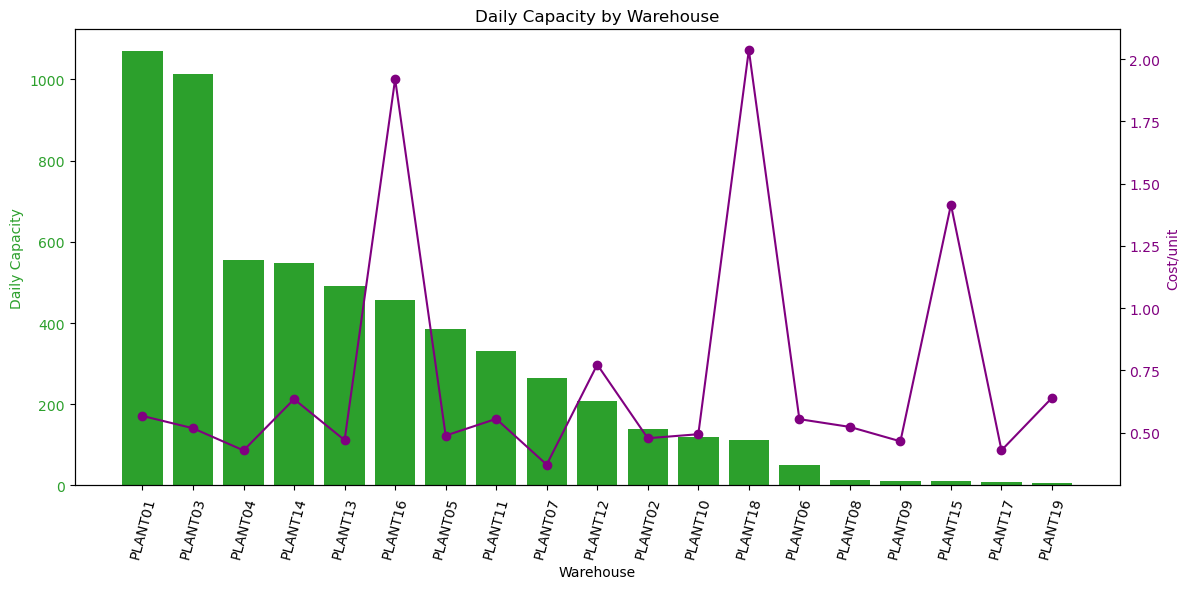

In [ ]:
# Load the 'warehouse_costs' and 'warehouse_capacities' tables
warehouse_costs = pd.read_excel('Supply chain logistics problem.xlsx', sheet_name='WhCosts')
warehouse_capacities = pd.read_excel('Supply chain logistics problem.xlsx', sheet_name='WhCapacities')

# Merge the two datasets based on 'WH' and 'Plant ID'
merged_data = pd.merge(warehouse_costs, warehouse_capacities, left_on='WH', right_on='Plant ID')

# Sort the data by 'Daily Capacity' in descending order
sorted_data = merged_data.sort_values(by='Daily Capacity ', ascending=False)

# Create a figure with two subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot 'Daily Capacity' on the primary y-axis
color1 = 'tab:green'
ax1.set_xlabel('Warehouse')
ax1.set_ylabel('Daily Capacity', color=color1)
ax1.bar(sorted_data['WH'], sorted_data['Daily Capacity '], color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_title('Daily Capacity by Warehouse')

# Create a secondary y-axis for 'Cost/unit'
ax2 = ax1.twinx()
color2 = '#800080'  # Wine color
ax2.set_ylabel('Cost/unit', color=color2)
ax2.plot(sorted_data['WH'], sorted_data['Cost/unit'], color=color2, marker='o')
ax2.tick_params(axis='y', labelcolor=color2)

# Customize the plot
ax1.tick_params(axis='x', rotation=75)
ax1.set_xticks(range(len(sorted_data['WH'])))
ax1.set_xticklabels(sorted_data['WH'])

# Display the chart
plt.tight_layout()
plt.show()


**Insight**: The above analysis reveals two key insights for supply chain logistics. Firstly, warehouses like PLANT01, PLANT03, and PLANT04 possess significantly high daily capacity, making them ideal candidates for accommodating large quantities of products. This insight aids businesses in optimizing inventory management, especially during peak demand periods. Secondly, warehouses such as PLANT07 and PLANT17 offer cost-efficient storage solutions with low cost per unit. Leveraging these warehouses can lead to substantial cost savings in the logistics chain.

**Recommendation**: Based on the analysis of warehouse capacities and costs per unit, we recommend that the company optimize warehouse utilization by efficiently using facilities with high daily capacities, such as PLANT01, PLANT03, and PLANT04, while strategically utilizing cost-efficient warehouses like PLANT07 and PLANT17 for products with lower space requirements. Regular capacity assessments, a strategic warehouse network, and data-driven decision-making will be essential in maintaining an agile supply chain that adapts to changing market demands, enhances efficiency, reduces operational costs, and ensures long-term competitiveness.

### Product Distribution Across Plants

In this section, we aim to understand the distribution of products across various plants within the supply chain logistics dataset. Understanding how products are distributed among different plants is crucial for optimizing inventory management, ensuring product availability, and enhancing overall supply chain efficiency. The insight derived from this investigation can help supply chain managers make informed decisions regarding inventory allocation, production planning, and distribution strategies.

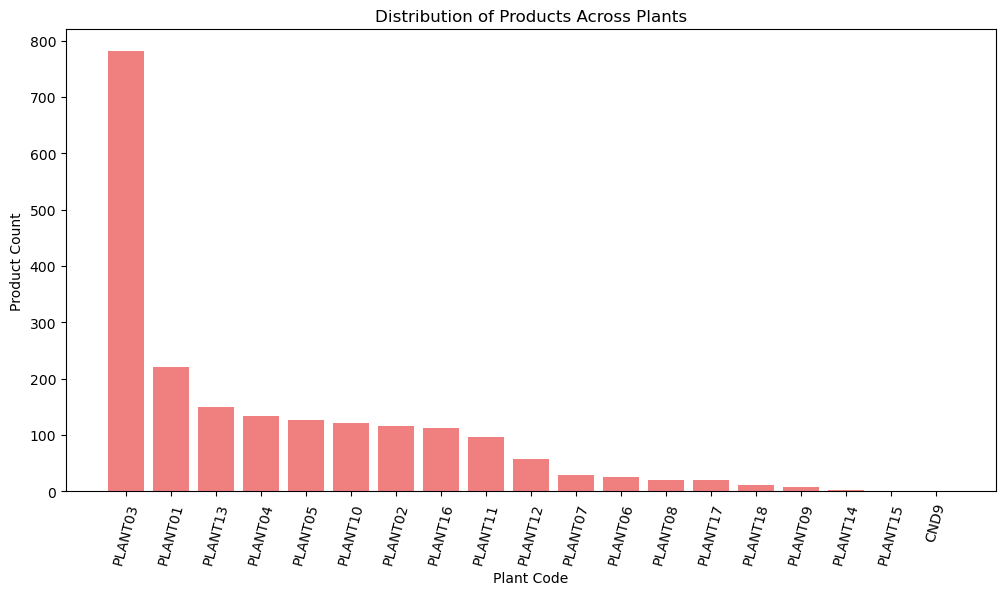

In [ ]:
# Load the 'products_per_plant' table
products_per_plant = pd.read_excel('Supply chain logistics problem.xlsx', sheet_name='ProductsPerPlant')

# Calculate the count of products per plant
product_distribution = products_per_plant['Plant Code'].value_counts().reset_index()
product_distribution.columns = ['Plant Code', 'Product Count']

# Create a bar chart to visualize the product distribution
plt.figure(figsize=(12, 6))
plt.bar(product_distribution['Plant Code'], product_distribution['Product Count'], color='lightcoral')
plt.xlabel('Plant Code')
plt.ylabel('Product Count')
plt.title('Distribution of Products Across Plants')
plt.xticks(rotation=75)
plt.show()


**Insight**: The above visualization indicates that PLANT03 has the highest product allocation, potentially making it a key distribution center, while several other plants maintain a substantial inventory. On the other hand, some plants, such as Plant 14, Plant 15, and CND9, have very limited product offerings, possibly suggesting specialized roles within the supply chain.

**Recommendation**: Based on the insight gained from the distribution of products across plants, we recommend that the company consider PLANT03 as a primary distribution hub due to its high product availability. Additionally, plants like Plant 15, CND9, and Plant 14 could be evaluated for specialized roles, such as handling unique or niche product lines. This strategic reallocation of resources and inventory management can enhance supply chain efficiency, reduce operational costs, and enable the company to better align its production and distribution processes with market demands.